In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df.shape

(100, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [6]:
df = df.iloc[:,1:]

In [7]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


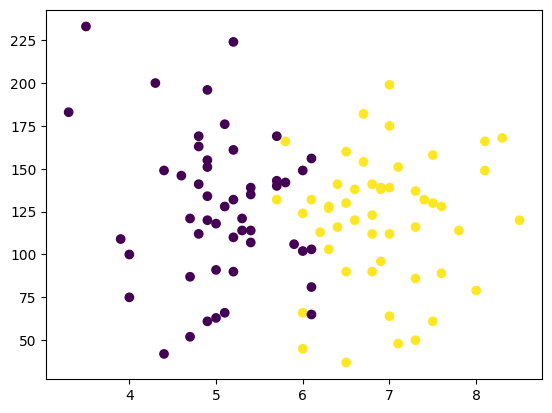

In [8]:
plt.scatter(df['cgpa'],df['iq'],c = df['placement'])

In [9]:
X = df.iloc[:,0:2]
Y = df.iloc[:,-1]

In [10]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [11]:
Y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [12]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.1)

In [13]:
x_train

,cgpa,iq
41,5.4,114.0
14,6.1,103.0
48,6.6,138.0
28,5.2,90.0
75,4.8,169.0
...,...,...
74,6.7,154.0
9,5.1,66.0
13,6.4,116.0
0,6.8,123.0


In [14]:
y_train

,placement
41,0
14,0
48,1
28,0
75,0
...,...
74,1
9,0
13,1
0,1


In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
x_train = scaler.fit_transform(x_train)

In [18]:
x_train

array([[-0.52663538, -0.16059196],
       [ 0.07660151, -0.43282834],
       [ 0.507485  ,  0.43337831],
       [-0.69898878, -0.75456224],
       [-1.04369557,  1.20058992],
       [-0.00957519, -1.86825651],
       [ 0.8521918 ,  1.94305276],
       [ 0.24895491, -0.43282834],
       [-0.69898878,  0.28488574],
       [ 1.36925199,  0.1858907 ],
       [ 0.8521918 ,  1.34908249],
       [-1.12987227, -0.82880852],
       [-0.78516548,  0.1858907 ],
       [-0.95751887,  0.75511221],
       [-1.47457907,  1.96780152],
       [ 1.80013548,  0.70561469],
       [-1.38840237, -1.94250279],
       [ 1.11072189,  0.40862955],
       [-0.95751887, -1.47227632],
       [-1.04369557, -0.21008949],
       [ 2.14484228, -0.01209939],
       [ 1.54160539, -0.16059196],
       [-1.12987227,  0.01264937],
       [-0.87134218, -0.06159692],
       [-0.69898878, -0.25958701],
       [ 1.28307529,  0.92835354],
       [ 0.7660151 , -0.60606967],
       [-0.09575189, -0.35858206],
       [-1.12987227,

In [19]:
x_test = scaler.transform(x_test)

In [20]:
x_test

array([[-0.18192859,  1.12634363],
       [ 0.8521918 ,  0.45812707],
       [ 0.4213083 ,  0.23538822],
       [-0.18192859,  0.53237336],
       [ 1.28307529,  0.23538822],
       [-0.69898878,  1.00259983],
       [-0.78516548,  1.37383125],
       [-0.95751887,  0.85410726],
       [-0.26810528,  1.20058992],
       [-1.21604897,  0.6313684 ]])

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
clf = LogisticRegression()

# Model Training

In [23]:
clf.fit(x_train,y_train)

LogisticRegression()

In [24]:
y_pred = clf.predict(x_test)

In [25]:
y_test

,placement
85,1
32,1
57,1
4,0
83,1
47,0
15,0
76,0
84,0
39,0


In [26]:
from sklearn.metrics import accuracy_score

In [27]:
accuracy_score(y_test,y_pred) * 100

90.0

In [28]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

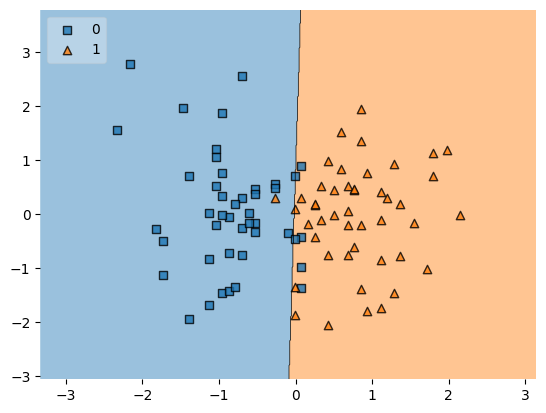

In [29]:
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)